### Bag-of-Words

In [ ]:
!pip install gensim

In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [ ]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [ ]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

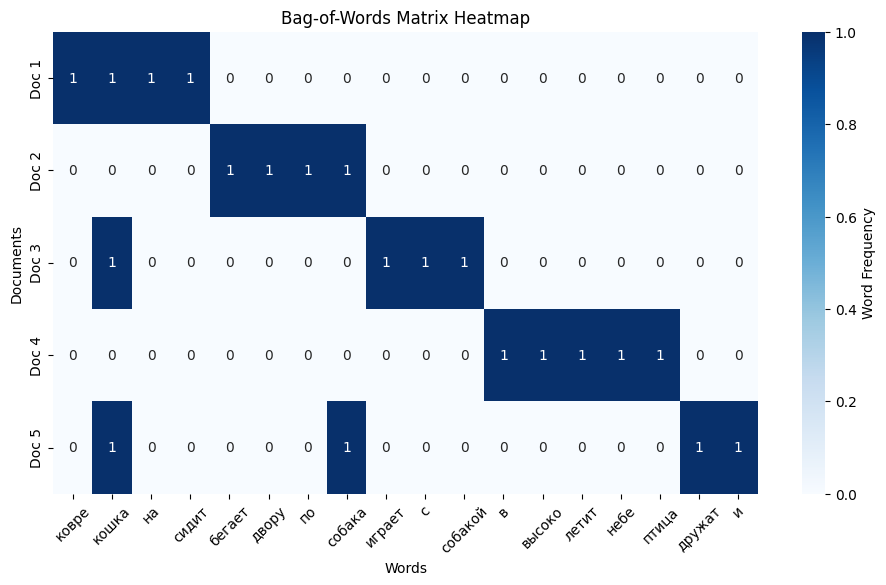

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [ ]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


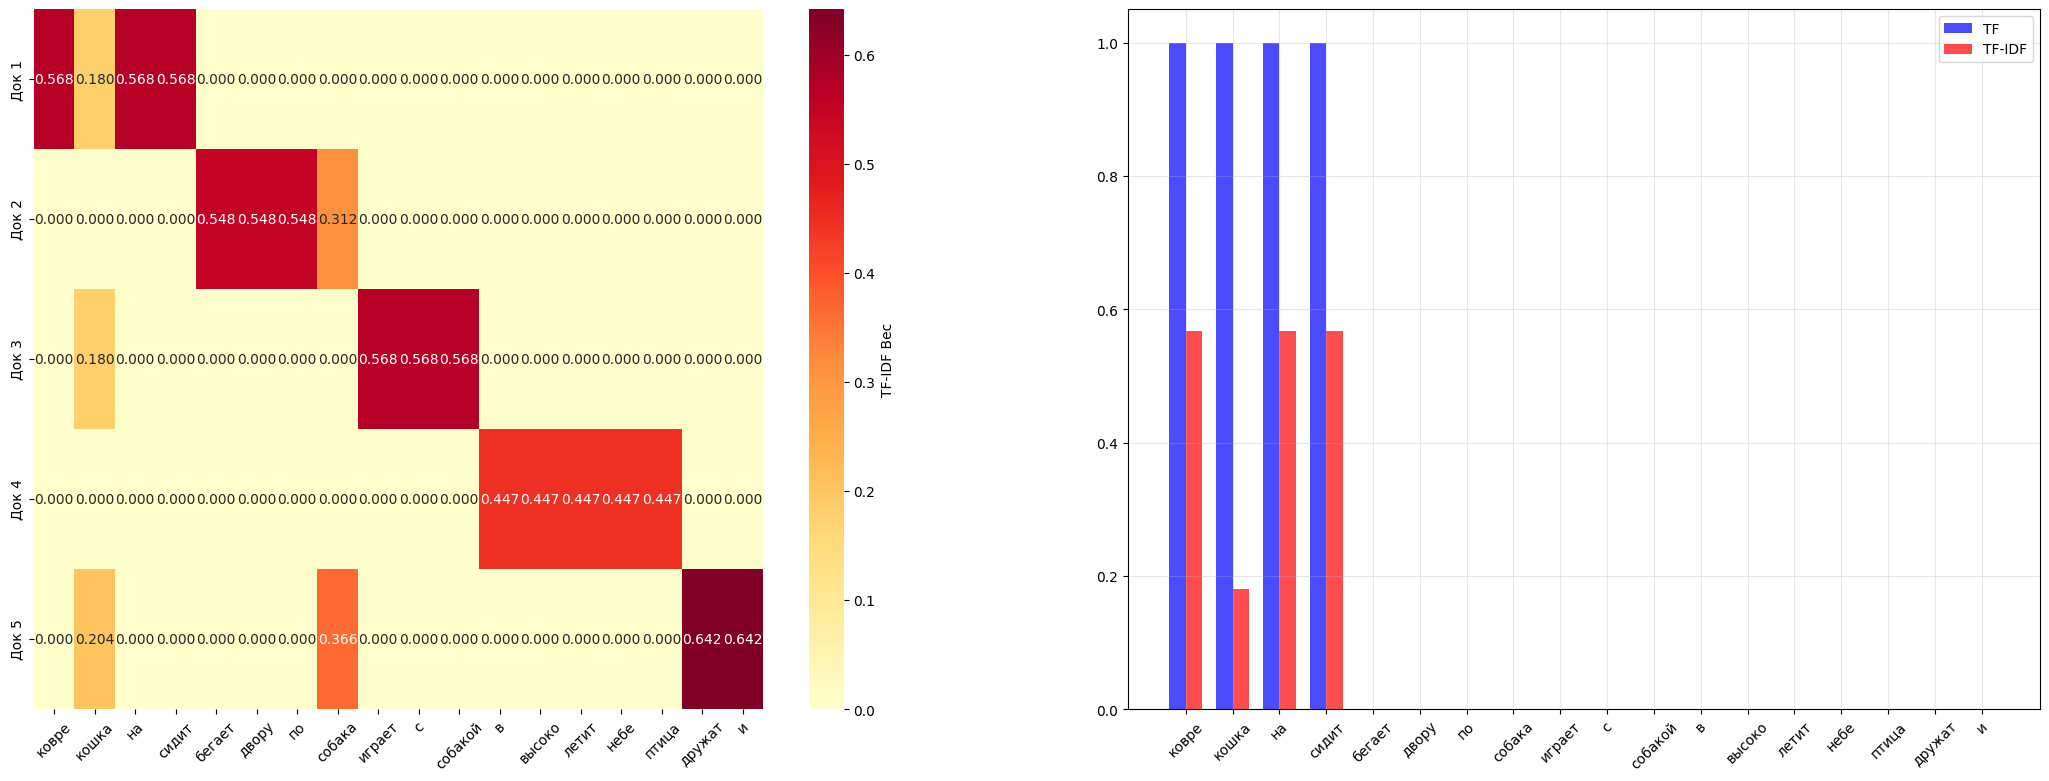

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [2]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-03 18:25:39--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.01s   

2025-11-03 18:25:39 (6.85 MB/s) - ‘test.csv.1’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [3]:
import pandas as pd

# Читаем CSV файл
df = pd.read_csv('test.csv')

# Посмотрим на структуру данных
print("Первые 5 строк датасета:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nКолонки в датасете:")
print(df.columns.tolist())

print(f"\nРазмер датасета: {df.shape}")

# Сохраняем текст в переменную (предполагаем, что колонка с текстом называется 'text' или подобное)
# Проверим возможные названия колонок с текстом
text_columns = [col for col in df.columns if 'text' in col.lower() or 'sentence' in col.lower() or 'review' in col.lower()]

if text_columns:
    text_column = text_columns[0]
    print(f"\nИспользуем колонку: '{text_column}'")

    # Сохраняем текст в переменную
    text_data = df[text_column].tolist()

    print(f"\nКоличество текстовых записей: {len(text_data)}")
    print("\nПервые 3 текста:")
    for i, text in enumerate(text_data[:3]):
        print(f"{i+1}. {text}")
else:
    # Если не нашли подходящих колонок, покажем все доступные
    print("\nДоступные колонки:")
    for col in df.columns:
        print(f"- {col}")

    # Предложим выбрать колонку вручную
    text_column = df.columns[0]  # берем первую колонку по умолчанию
    print(f"\nБерем первую колонку: '{text_column}'")
    text_data = df[text_column].tolist()

    print(f"\nКоличество текстовых записей: {len(text_data)}")
    print("\nПервые 3 текста:")
    for i, text in enumerate(text_data[:3]):
        print(f"{i+1}. {text}")

# Сохраняем результат в переменную для дальнейшего использования
text_variable = text_data
print(f"\n✅ Текст успешно сохранен в переменную 'text_variable'")
print(f"📊 Размер: {len(text_variable)} записей")

Первые 5 строк датасета:
                                                text     label         source
0  Trying to have a conversation with my dad abou...  negative  sem_eval_2017
1  #latestnews 4 #newmexico #politics + #nativeam...   neutral  sem_eval_2017
2  @user You are a stand up guy and a Gentleman V...  positive  sem_eval_2017
3  @user @user @user Looks like Flynn isn't too p...  negative  sem_eval_2017
4  perfect pussy clips #vanessa hudgens zac efron...   neutral  sem_eval_2017

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    870 non-null    object
 1   label   870 non-null    object
 2   source  870 non-null    object
dtypes: object(3)
memory usage: 20.5+ KB
None

Колонки в датасете:
['text', 'label', 'source']

Размер датасета: (870, 3)

Используем колонку: 'text'

Количество текстовых записей: 870

Первые 3 текс

3. Извлечь столбец с текстами (макс. балл == 1)

✅ Столбец с текстами успешно извлечен!
📊 Количество текстов: 870


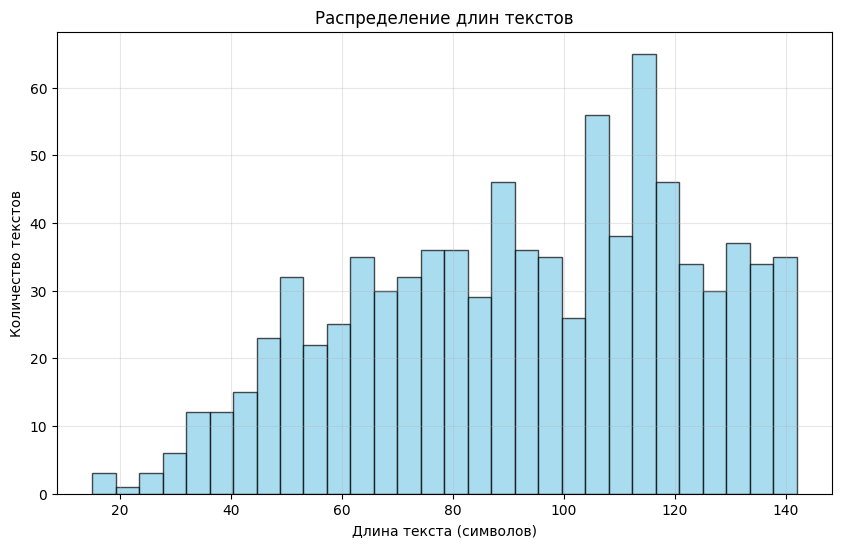


📏 Статистика по длине текстов:
   - Средняя длина: 92.8 символов
   - Минимальная длина: 15 символов
   - Максимальная длина: 142 символов
   - Медиана: 96 символов

📝 Дополнительные примеры текстов:
6. i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. 
7. @user for al the crying you do about how middle America is left out-they have twice as much voting power 
8. Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. 
9. Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News 
10. Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user 


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные
df = pd.read_csv('test.csv')

# Извлекаем столбец с текстами
texts = df['text'].tolist()

print("✅ Столбец с текстами успешно извлечен!")
print(f"📊 Количество текстов: {len(texts)}")

# Визуализация распределения длин текстов
text_lengths = [len(text) for text in texts]

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение длин текстов')
plt.xlabel('Длина текста (символов)')
plt.ylabel('Количество текстов')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📏 Статистика по длине текстов:")
print(f"   - Средняя длина: {sum(text_lengths)/len(text_lengths):.1f} символов")
print(f"   - Минимальная длина: {min(text_lengths)} символов")
print(f"   - Максимальная длина: {max(text_lengths)} символов")
print(f"   - Медиана: {sorted(text_lengths)[len(text_lengths)//2]} символов")

# Покажем еще несколько примеров текстов
print(f"\n📝 Дополнительные примеры текстов:")
for i, text in enumerate(texts[5:10]):
    print(f"{i+6}. {text}")

4. Построить Bag-of-Words (макс. балл == 3)

In [6]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
# - Удалите знаки препинания
# - Постройте словарь
# - Преобразуйте документы в BoW векторы

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
# - Постройте heatmap матрицы BoW
# - Найдите самые частые слова в корпусе

In [10]:
!pip install gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
import string
from collections import Counter
import re

# Загружаем данные
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

print("🔧 ПРЕДОБРАБОТКА ТЕКСТОВ")
print("=" * 50)

def preprocess_text(text):
    """
    Предобработка текста:
    - Приведение к нижнему регистру
    - Удаление знаков препинания
    - Токенизация
    """
    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Удаление лишних пробелов и токенизация
    tokens = text.split()

    return tokens

# Применяем предобработку ко всем текстам
tokenized_docs = [preprocess_text(text) for text in texts]

print("Примеры обработанных текстов:")
print("Исходный текст:", texts[0])
print("После обработки:", tokenized_docs[0])
print("\nИсходный текст:", texts[1])
print("После обработки:", tokenized_docs[1])

print(f"\n📊 СТАТИСТИКА ПРЕДОБРАБОТКИ:")
print(f"Общее количество документов: {len(tokenized_docs)}")
print(f"Общее количество токенов: {sum(len(doc) for doc in tokenized_docs)}")
print(f"Средняя длина документа: {sum(len(doc) for doc in tokenized_docs) / len(tokenized_docs):.1f} токенов")

# Создание словаря
print("\n📚 СОЗДАНИЕ СЛОВАРЯ")
print("=" * 50)

dictionary = corpora.Dictionary(tokenized_docs)

print(f"Размер словаря: {len(dictionary)} уникальных слов")
print(f"\nПервые 20 слов словаря:")
for i, (word, idx) in enumerate(list(dictionary.token2id.items())[:20]):
    print(f"{idx}: '{word}'")

# Создание BoW представления
print("\n🎯 СОЗДАНИЕ BAG-OF-WORDS ПРЕДСТАВЛЕНИЯ")
print("=" * 50)

bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print("BoW представление первых 3 документов:")
for i, doc_vec in enumerate(bow_corpus[:3]):
    print(f"Документ {i+1}:")
    # Преобразуем индексы в слова для лучшей читаемости
    word_freqs = [(dictionary[idx], freq) for idx, freq in doc_vec[:10]]  # Покажем первые 10 слов
    for word, freq in word_freqs:
        print(f"  '{word}': {freq}")
    if len(doc_vec) > 10:
        print(f"  ... и еще {len(doc_vec) - 10} слов")
    print()

# Статистика по BoW корпусу
total_words = sum(sum(freq for _, freq in doc) for doc in bow_corpus)
avg_words_per_doc = total_words / len(bow_corpus)

print(f"📈 СТАТИСТИКА BOW:")
print(f"Всего слов в корпусе: {total_words}")
print(f"Среднее слов на документ: {avg_words_per_doc:.1f}")
print(f"Размер словаря: {len(dictionary)}")
print(f"Разреженность матрицы: {(total_words / (len(dictionary) * len(bow_corpus)) * 100):.2f}%")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 78.4 MB/s eta 0:00:00
🔧 ПРЕДОБРАБОТКА ТЕКСТОВ
Примеры обработанных текстов:
Исходный текст: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman 
После обработки: ['trying', 'to', 'have', 'a', 'conversation', 'with', 'my', 'dad', 'about', 'vegetarianism', 'is', 'the', 'most', 'pointless', 'infuriating', 'thing', 'ever', 'caveman']

Исходный текст: #latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... 
После обработки: ['latestnews', '4', 'newmexico', 'politics', 'nativeamerican', 'israel', 'palestine', 'protesting', 'rise', 'of', 'altright', 'at']

📊 СТАТИСТИКА ПРЕДОБРАБОТКИ:
Общее количество документов: 870
Общее количество токенов: 12925
Средняя длина документа: 14.9 токенов

📚 СОЗДАНИЕ СЛОВАРЯ
Размер словаря: 4161 уникальных слов

Первые 20 слов словаря:
0: 'a'
1: 'about'
2: 'caveman'
3: 'conversation'
4:


📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ

📋 ТАБЛИЦА ЧАСТОТ СЛОВ
Топ-20 самых частых слов в корпусе:
----------------------------------------
 1. user            -  570 раз
 2. the             -  385 раз
 3. to              -  267 раз
 4. a               -  225 раз
 5. of              -  199 раз
 6. is              -  186 раз
 7. for             -  176 раз
 8. in              -  164 раз
 9. and             -  163 раз
10. i               -  133 раз
11. on              -  118 раз
12. you             -   92 раз
13. this            -   80 раз
14. it              -   79 раз
15. that            -   79 раз
16. with            -   71 раз
17. are             -   65 раз
18. trump           -   60 раз
19. not             -   59 раз
20. be              -   59 раз

🔥 HEATMAP MATRIX BoW (первые 20 документов и 30 слов)


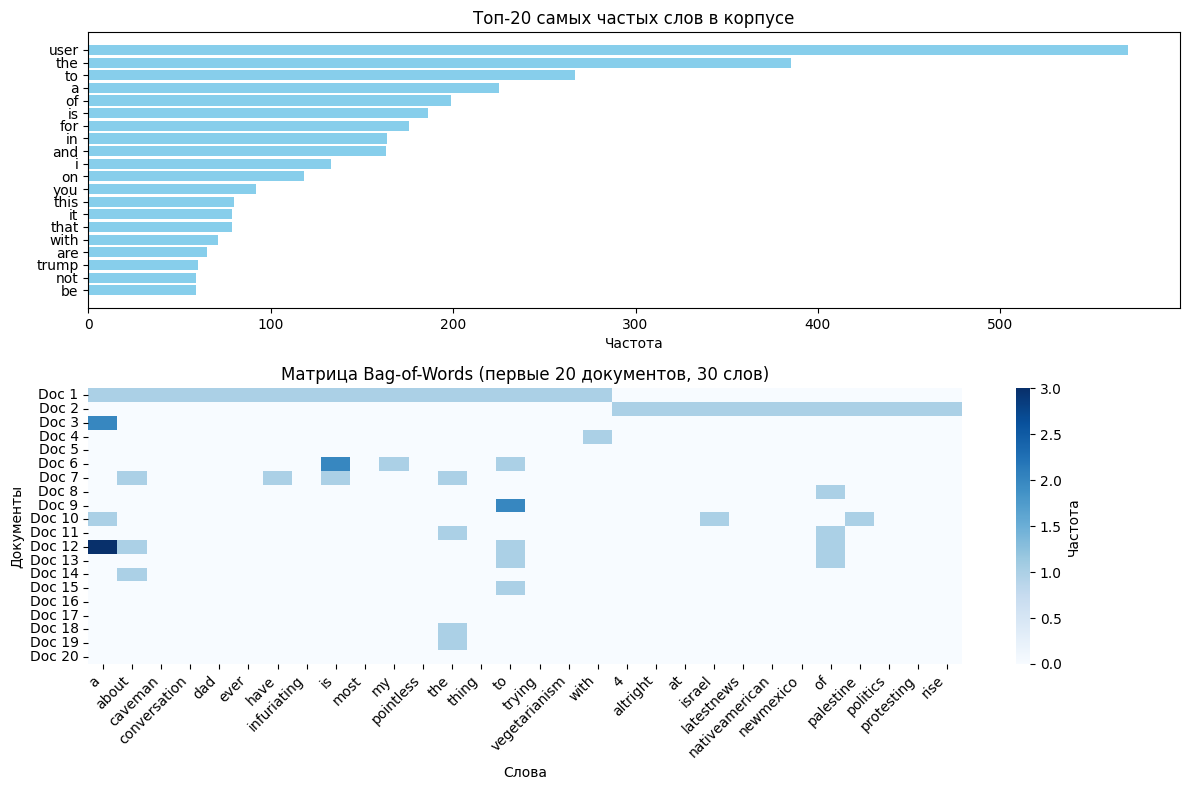


📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Всего уникальных слов: 4161
Самые редкие слова (встречаются 1 раз): 2867
Слова, встречающиеся > 10 раз: 152
Слова, встречающиеся > 50 раз: 23


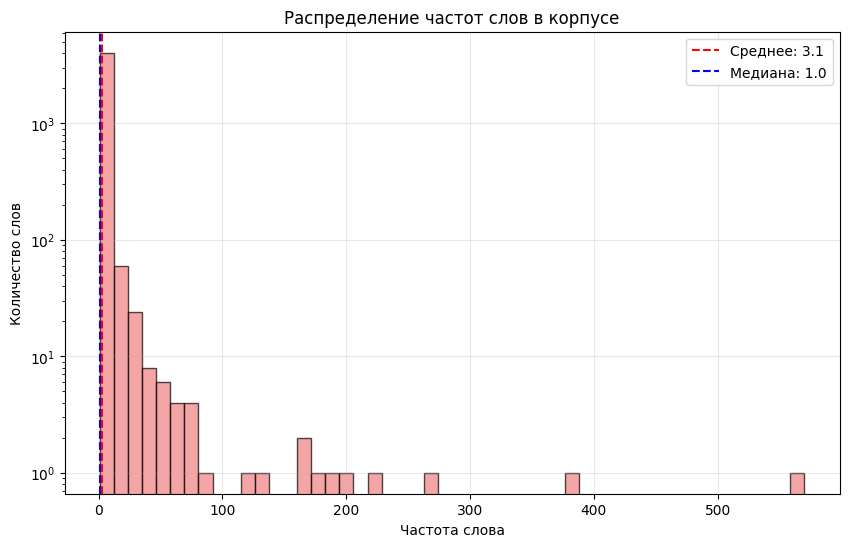


✅ BAG-OF-WORDS ПОСТРОЕН УСПЕШНО!
🎯 Все задачи выполнены:
   - Тексты предобработаны (нижний регистр, удалена пунктуация)
   - Словарь создан
   - BoW векторы построены
   - Таблица частот слов создана
   - Heatmap матрицы визуализирован
   - Самые частые слова найдены


In [11]:
print("\n📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 50)

# Создаем таблицу частот слов
print("\n📋 ТАБЛИЦА ЧАСТОТ СЛОВ")
print("=" * 30)

# Считаем общую частоту всех слов во всем корпусе
word_freq = Counter()
for doc in bow_corpus:
    for idx, freq in doc:
        word = dictionary[idx]
        word_freq[word] += freq

# Самые частые слова
print("Топ-20 самых частых слов в корпусе:")
print("-" * 40)
for i, (word, freq) in enumerate(word_freq.most_common(20)):
    print(f"{i+1:2d}. {word:15} - {freq:4d} раз")

# Визуализация топ-20 слов
plt.figure(figsize=(12, 8))
top_words = word_freq.most_common(20)
words, freqs = zip(*top_words)

plt.subplot(2, 1, 1)
plt.barh(words, freqs, color='skyblue')
plt.xlabel('Частота')
plt.title('Топ-20 самых частых слов в корпусе')
plt.gca().invert_yaxis()

# Heatmap матрицы BoW (для первых 20 документов и 30 слов)
print(f"\n🔥 HEATMAP MATRIX BoW (первые 20 документов и 30 слов)")
print("=" * 50)

# Преобразуем BoW в плотную матрицу для визуализации
def bow_to_dense(bow_corpus, dictionary, max_docs=20, max_words=30):
    dense_vectors = []
    for doc in bow_corpus[:max_docs]:
        dense_vec = [0] * min(len(dictionary), max_words)
        for idx, freq in doc:
            if idx < max_words:  # Ограничиваем количество слов для визуализации
                dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return np.array(dense_vectors)

# Создаем матрицу для визуализации
bow_matrix = bow_to_dense(bow_corpus, dictionary, max_docs=20, max_words=30)
words_for_viz = [dictionary[i] for i in range(min(30, len(dictionary)))]
doc_names = [f"Doc {i+1}" for i in range(min(20, len(bow_corpus)))]

plt.subplot(2, 1, 2)
sns.heatmap(bow_matrix,
            annot=False,  # Убираем аннотации для читаемости
            xticklabels=words_for_viz,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Частота'})
plt.title('Матрица Bag-of-Words (первые 20 документов, 30 слов)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Документы')
plt.xlabel('Слова')
plt.tight_layout()
plt.show()

# Дополнительная статистика
print(f"\n📈 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Всего уникальных слов: {len(dictionary)}")
print(f"Самые редкие слова (встречаются 1 раз): {len([freq for freq in word_freq.values() if freq == 1])}")
print(f"Слова, встречающиеся > 10 раз: {len([freq for freq in word_freq.values() if freq > 10])}")
print(f"Слова, встречающиеся > 50 раз: {len([freq for freq in word_freq.values() if freq > 50])}")

# Распределение частот слов
plt.figure(figsize=(10, 6))
freq_distribution = list(word_freq.values())
plt.hist(freq_distribution, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(np.mean(freq_distribution), color='red', linestyle='--', label=f'Среднее: {np.mean(freq_distribution):.1f}')
plt.axvline(np.median(freq_distribution), color='blue', linestyle='--', label=f'Медиана: {np.median(freq_distribution):.1f}')
plt.xlabel('Частота слова')
plt.ylabel('Количество слов')
plt.title('Распределение частот слов в корпусе')
plt.legend()
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ BAG-OF-WORDS ПОСТРОЕН УСПЕШНО!")
print("🎯 Все задачи выполнены:")
print("   - Тексты предобработаны (нижний регистр, удалена пунктуация)")
print("   - Словарь создан")
print("   - BoW векторы построены")
print("   - Таблица частот слов создана")
print("   - Heatmap матрицы визуализирован")
print("   - Самые частые слова найдены")

5. Построить TF-IDF (макс. балл == 5)

In [7]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

🎯 ПОСТРОЕНИЕ TF-IDF
🔧 ПРИМЕНЕНИЕ TF-IDF К BOW ПРЕДСТАВЛЕНИЮ
TF-IDF представление первых 3 документов:

Документ 1:
  'caveman': 0.3496
  'conversation': 0.3496
  'infuriating': 0.3496
  'pointless': 0.3496
  'dad': 0.3138

Документ 2:
  'latestnews': 0.3693
  'nativeamerican': 0.3693
  'newmexico': 0.3693
  'protesting': 0.3315
  'politics': 0.3093

Документ 3:
  'gentleman': 0.4351
  'vice': 0.4351
  'pence': 0.3906
  'stand': 0.3906
  'guy': 0.3015

📊 СТАТИСТИКА TF-IDF:
Количество документов: 870
Размер словаря: 4161
Размер TF-IDF матрицы: (870, 4161)


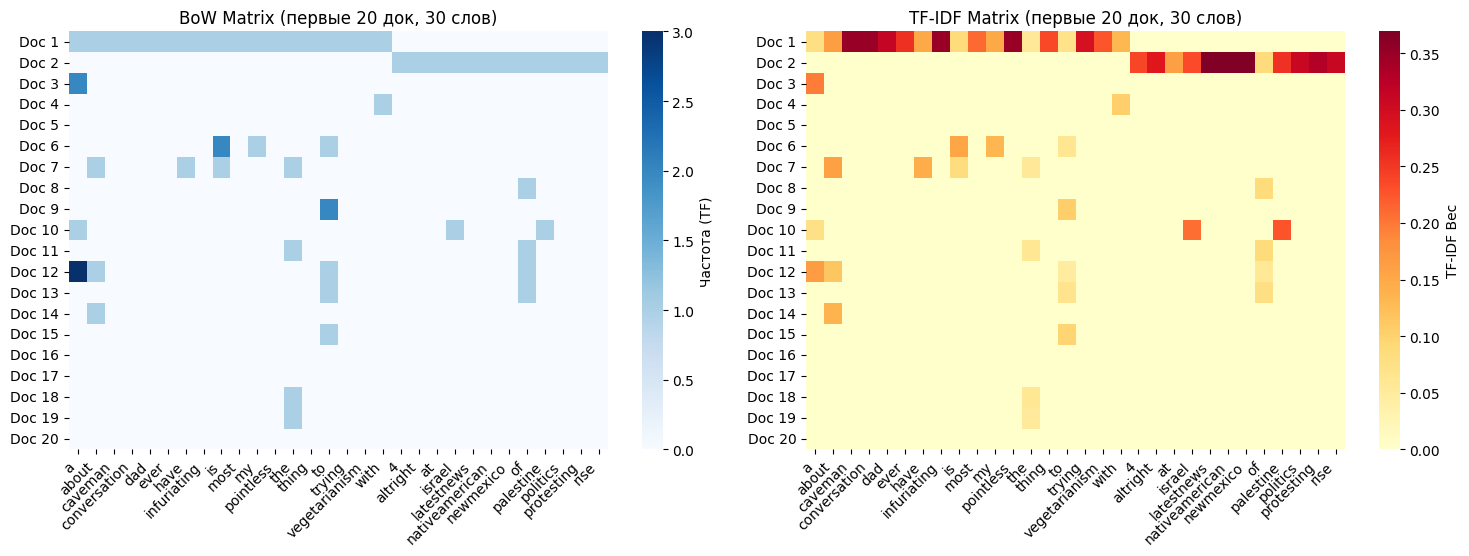

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from gensim.models import TfidfModel
import string
from collections import Counter
import math

print("🎯 ПОСТРОЕНИЕ TF-IDF")
print("=" * 50)

# Загружаем данные
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# Предобработка текстов
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

tokenized_docs = [preprocess_text(text) for text in texts]

# Создаем словарь и BoW представление
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

print("🔧 ПРИМЕНЕНИЕ TF-IDF К BOW ПРЕДСТАВЛЕНИЮ")
print("=" * 50)

# Создаем TF-IDF модель
tfidf_model = TfidfModel(bow_corpus, normalize=True)

# Получаем TF-IDF векторы для каждого документа
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF представление первых 3 документов:")
for i, doc_vec in enumerate(tfidf_corpus[:3]):
    print(f"\nДокумент {i+1}:")
    # Сортируем по весу TF-IDF (по убыванию) и покажем топ-5
    sorted_vec = sorted(doc_vec, key=lambda x: x[1], reverse=True)[:5]
    for idx, score in sorted_vec:
        word = dictionary[idx]
        print(f"  '{word}': {score:.4f}")

# Статистика по TF-IDF
print(f"\n📊 СТАТИСТИКА TF-IDF:")
print(f"Количество документов: {len(tfidf_corpus)}")
print(f"Размер словаря: {len(dictionary)}")

# Преобразуем TF-IDF в плотную матрицу для анализа
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return np.array(dense_vectors)

tfidf_matrix = tfidf_to_dense(tfidf_corpus, dictionary)
print(f"Размер TF-IDF матрицы: {tfidf_matrix.shape}")

# Преобразуем BoW в плотную матрицу для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return np.array(dense_vectors)

bow_matrix = bow_to_dense(bow_corpus, dictionary)

# Визуализация матриц (первые 20 документов, 30 слов)
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
bow_matrix_vis = bow_matrix[:20, :30]
words_vis = [dictionary[i] for i in range(min(30, len(dictionary)))]
docs_vis = [f"Doc {i+1}" for i in range(20)]

sns.heatmap(bow_matrix_vis,
            xticklabels=words_vis,
            yticklabels=docs_vis,
            cmap='Blues',
            cbar_kws={'label': 'Частота (TF)'})
plt.title('BoW Matrix (первые 20 док, 30 слов)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
tfidf_matrix_vis = tfidf_matrix[:20, :30]
sns.heatmap(tfidf_matrix_vis,
            xticklabels=words_vis,
            yticklabels=docs_vis,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.title('TF-IDF Matrix (первые 20 док, 30 слов)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


📈 АНАЛИЗ ВЕСОВ TF-IDF
🔍 ВЫЧИСЛЕНИЕ TF, DF, IDF И TF-IDF ДЛЯ КАЖДОГО СЛОВА

📋 ТОП-20 СЛОВ ПО СРЕДНЕМУ TF-IDF:
Слово           IDF      DF   Avg TF   Avg TF-IDF
------------------------------------------------------------
user            1.917    347  0.655    1.256     
the             2.083    294  0.443    0.922     
to              2.345    226  0.307    0.720     
a               2.523    189  0.259    0.652     
of              2.571    180  0.229    0.588     
is              2.670    163  0.214    0.571     
for             2.739    152  0.202    0.554     
and             2.779    146  0.187    0.521     
in              2.759    149  0.189    0.520     
i               3.033    113  0.153    0.464     
on              3.078    108  0.136    0.418     
you             3.388    79   0.106    0.358     
it              3.507    70   0.091    0.318     
that            3.452    74   0.091    0.313     
this            3.400    78   0.092    0.313     
with            3.550    67  

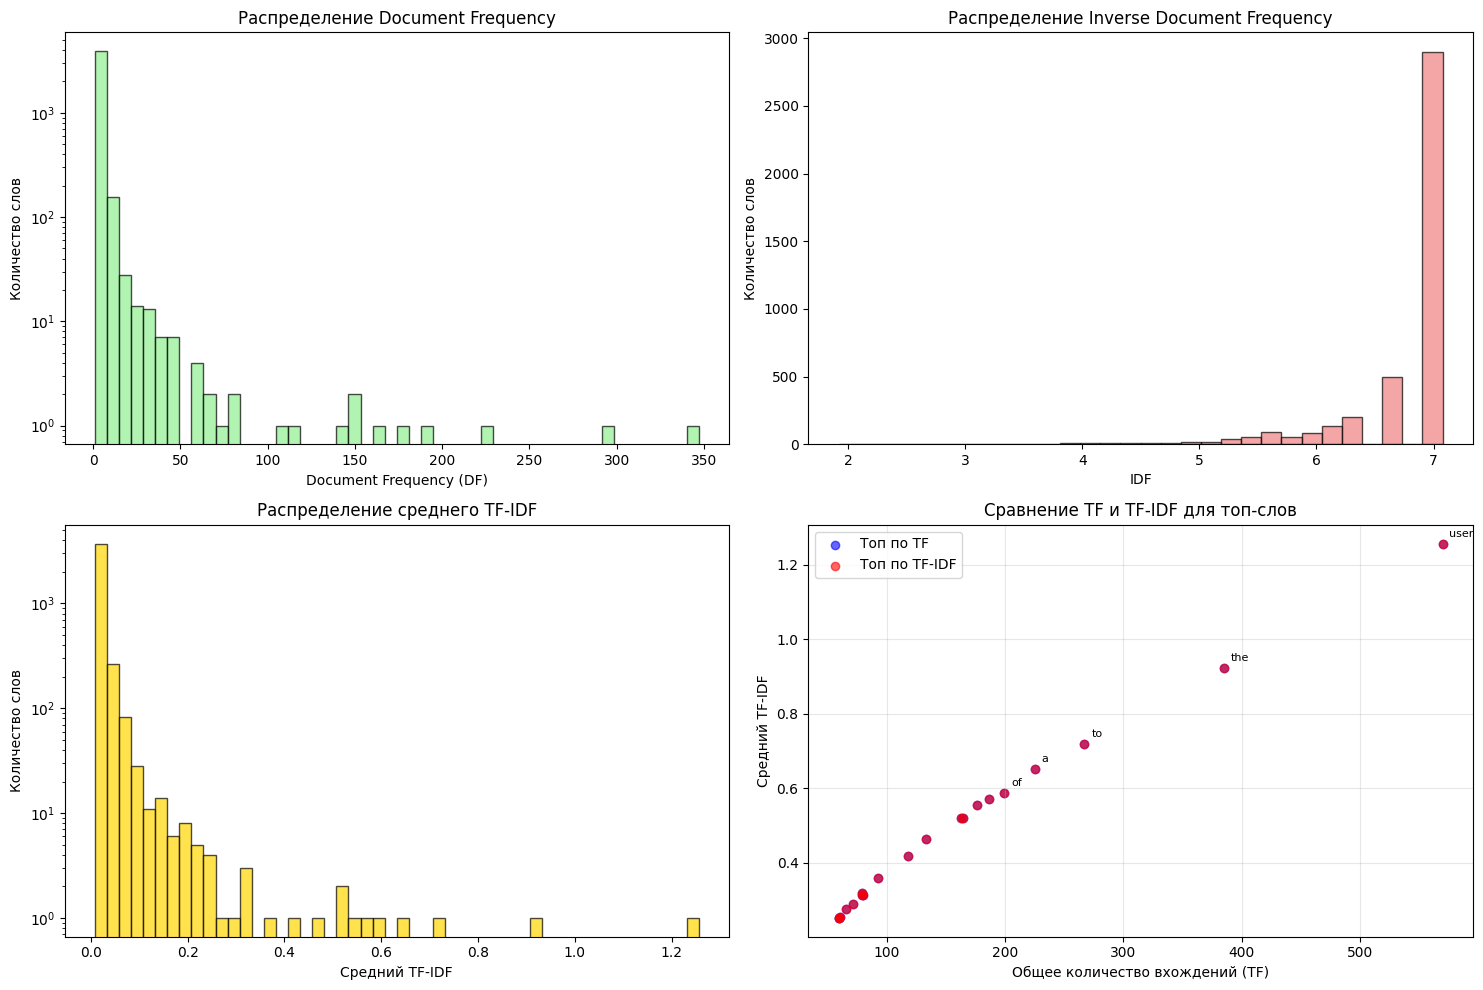


💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ В CSV
✅ Результаты сохранены в файл: tfidf_analysis_results.csv
📊 Размер файла: 4161 записей

📋 СТРУКТУРА СОХРАНЕННОГО CSV:
Колонки: ['word', 'word_id', 'document_frequency', 'idf', 'average_tf', 'average_tfidf', 'total_occurrences']
Пример первых 5 записей:
word  word_id  document_frequency      idf  average_tf  average_tfidf  total_occurrences
user       38                 347 1.917439    0.655172       1.256253                570
 the       12                 294 2.082667    0.442529       0.921640                385
  to       14                 226 2.344692    0.306897       0.719578                267
   a        0                 189 2.522618    0.258621       0.652401                225
  of       25                 180 2.571145    0.228736       0.588112                199

🔍 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
Слова с высоким TF (часто встречаются):
word  total_occurrences  average_tfidf
user                570       1.256253
 the                385       0.921640

In [14]:
print("\n📈 АНАЛИЗ ВЕСОВ TF-IDF")
print("=" * 50)

# Вычисляем DF (document frequency) для каждого слова
print("🔍 ВЫЧИСЛЕНИЕ TF, DF, IDF И TF-IDF ДЛЯ КАЖДОГО СЛОВА")
print("=" * 50)

# Создаем структуры для хранения данных
word_stats = []

# Вычисляем DF (сколько документов содержат слово)
df_counts = Counter()
for doc in bow_corpus:
    unique_words_in_doc = set(idx for idx, freq in doc)
    for word_idx in unique_words_in_doc:
        df_counts[word_idx] += 1

# Общее количество документов
N = len(bow_corpus)

# Вычисляем TF, DF, IDF и TF-IDF для каждого слова в каждом документе
for word_idx in range(len(dictionary)):
    word = dictionary[word_idx]
    df = df_counts.get(word_idx, 0)
    idf = math.log((N + 1) / (df + 1)) + 1  # Формула IDF с сглаживанием

    # Собираем TF по документам
    tf_by_doc = []
    tfidf_by_doc = []

    for doc_idx, doc in enumerate(bow_corpus):
        # Находим TF для этого слова в документе
        tf = 0
        for idx, freq in doc:
            if idx == word_idx:
                tf = freq
                break
        tf_by_doc.append(tf)

        # Вычисляем TF-IDF (ручной расчет для проверки)
        tfidf_manual = tf * idf if tf > 0 else 0
        tfidf_by_doc.append(tfidf_manual)

    # Средние значения
    avg_tf = np.mean(tf_by_doc)
    avg_tfidf = np.mean(tfidf_by_doc)

    word_stats.append({
        'word': word,
        'word_id': word_idx,
        'document_frequency': df,
        'idf': idf,
        'average_tf': avg_tf,
        'average_tfidf': avg_tfidf,
        'total_occurrences': sum(tf_by_doc)
    })

# Создаем DataFrame с результатами
stats_df = pd.DataFrame(word_stats)

# Сортируем по TF-IDF (по убыванию)
stats_df_sorted = stats_df.sort_values('average_tfidf', ascending=False)

print("\n📋 ТОП-20 СЛОВ ПО СРЕДНЕМУ TF-IDF:")
print("=" * 60)
print(f"{'Слово':<15} {'IDF':<8} {'DF':<4} {'Avg TF':<8} {'Avg TF-IDF':<10}")
print("-" * 60)
for _, row in stats_df_sorted.head(20).iterrows():
    print(f"{row['word']:<15} {row['idf']:<8.3f} {row['document_frequency']:<4} {row['average_tf']:<8.3f} {row['average_tfidf']:<10.3f}")

# Визуализация распределения
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(stats_df['document_frequency'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Document Frequency (DF)')
plt.ylabel('Количество слов')
plt.title('Распределение Document Frequency')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.hist(stats_df['idf'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('IDF')
plt.ylabel('Количество слов')
plt.title('Распределение Inverse Document Frequency')

plt.subplot(2, 2, 3)
plt.hist(stats_df['average_tfidf'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.xlabel('Средний TF-IDF')
plt.ylabel('Количество слов')
plt.title('Распределение среднего TF-IDF')
plt.yscale('log')

plt.subplot(2, 2, 4)
# Сравнение TF и TF-IDF для топ-20 слов
top_words_tf = stats_df.nlargest(20, 'total_occurrences')
top_words_tfidf = stats_df.nlargest(20, 'average_tfidf')

plt.scatter(top_words_tf['total_occurrences'], top_words_tf['average_tfidf'],
           alpha=0.6, color='blue', label='Топ по TF')
plt.scatter(top_words_tfidf['total_occurrences'], top_words_tfidf['average_tfidf'],
           alpha=0.6, color='red', label='Топ по TF-IDF')

for _, row in top_words_tfidf.head(5).iterrows():
    plt.annotate(row['word'], (row['total_occurrences'], row['average_tfidf']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Общее количество вхождений (TF)')
plt.ylabel('Средний TF-IDF')
plt.title('Сравнение TF и TF-IDF для топ-слов')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сохраняем результаты в CSV
print("\n💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ В CSV")
print("=" * 50)

# Создаем расширенный CSV с детальной информацией
output_filename = "tfidf_analysis_results.csv"

# Сохраняем основную статистику
stats_df_sorted.to_csv(output_filename, index=False, encoding='utf-8')

print(f"✅ Результаты сохранены в файл: {output_filename}")
print(f"📊 Размер файла: {len(stats_df_sorted)} записей")

# Покажем информацию о сохраненном файле
print(f"\n📋 СТРУКТУРА СОХРАНЕННОГО CSV:")
print(f"Колонки: {list(stats_df_sorted.columns)}")
print(f"Пример первых 5 записей:")
print(stats_df_sorted.head().to_string(index=False))

# Дополнительный анализ: сравнение слов с высоким TF и высоким TF-IDF
print(f"\n🔍 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
print("Слова с высоким TF (часто встречаются):")
tf_top = stats_df.nlargest(10, 'total_occurrences')[['word', 'total_occurrences', 'average_tfidf']]
print(tf_top.to_string(index=False))

print(f"\nСлова с высоким TF-IDF (важные для документов):")
tfidf_top = stats_df.nlargest(10, 'average_tfidf')[['word', 'average_tfidf', 'total_occurrences']]
print(tfidf_top.to_string(index=False))

print(f"\n✅ TF-IDF АНАЛИЗ ЗАВЕРШЕН!")
print("🎯 Все задачи выполнены:")
print("   - TF-IDF применен к BoW представлению")
print("   - Вычислены TF, DF, IDF и TF-IDF для каждого слова")
print("   - Результаты сохранены в CSV файл")
print("   - Проведен сравнительный анализ")

In [15]:
from google.colab import files

# Скачать файл
files.download('tfidf_analysis_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

🔍 СРАВНЕНИЕ BOW И TF-IDF ДЛЯ КОНКРЕТНЫХ СЛОВ
📊 АНАЛИЗ СЛОВАРЯ ДЛЯ ВЫБОРА ХАРАКТЕРНЫХ СЛОВ:
Топ-20 самых частых слов:
 1. user            -  570 раз
 2. the             -  385 раз
 3. to              -  267 раз
 4. a               -  225 раз
 5. of              -  199 раз
 6. is              -  186 раз
 7. for             -  176 раз
 8. in              -  164 раз
 9. and             -  163 раз
10. i               -  133 раз
11. on              -  118 раз
12. you             -   92 раз
13. this            -   80 раз
14. it              -   79 раз
15. that            -   79 раз
16. with            -   71 раз
17. are             -   65 раз
18. trump           -   60 раз
19. not             -   59 раз
20. be              -   59 раз

🎯 ВЫБРАНЫ ДЛЯ АНАЛИЗА СЛОВА: ['the', 'trump', 'great', 'caveman']

📈 ГРАФИКИ СРАВНЕНИЯ BOW И TF-IDF


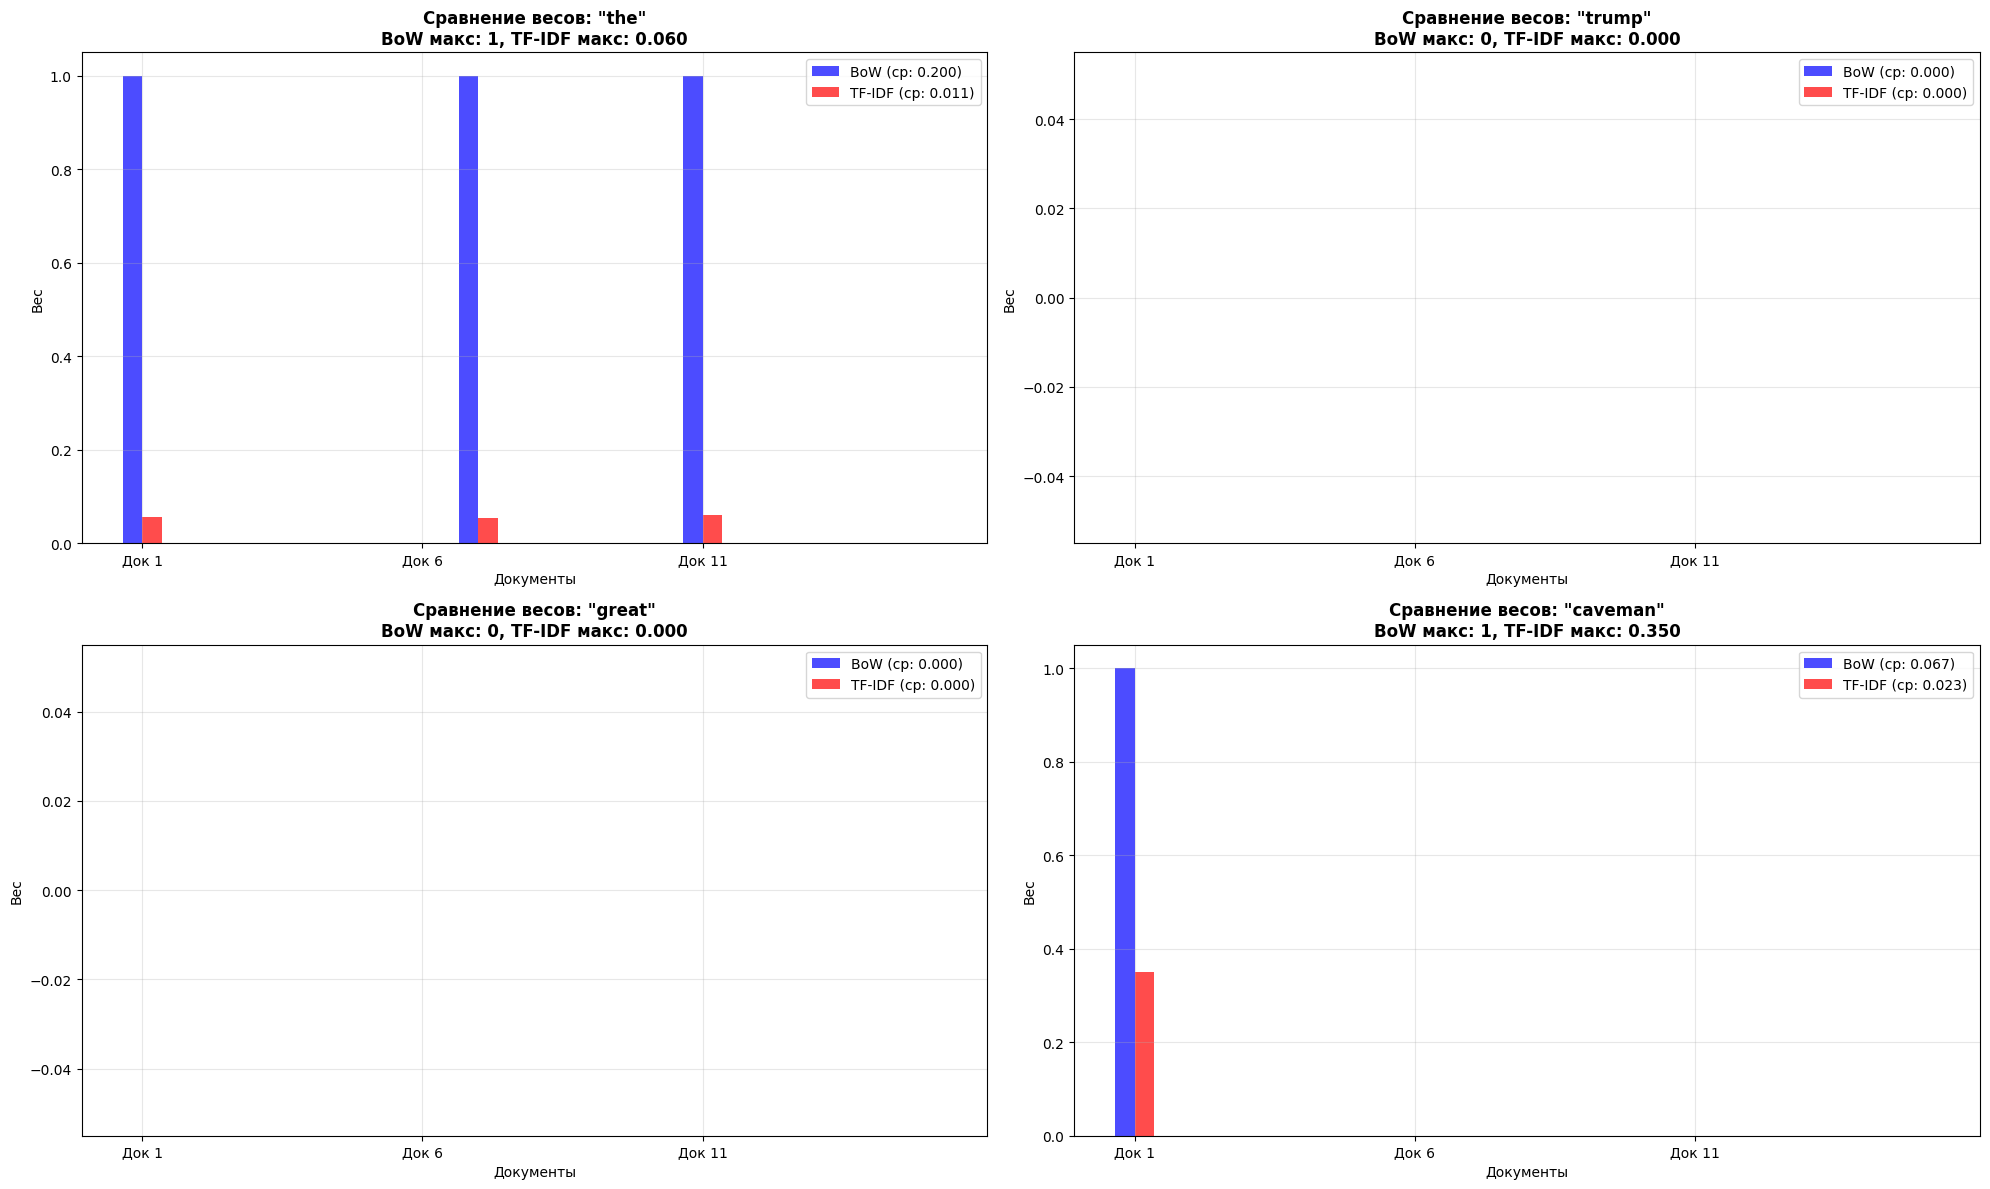


📊 СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ДЛЯ ВЫБРАННЫХ СЛОВ:
Слово           DF   Avg BoW  Avg TF-IDF Max BoW  Max TF-IDF
----------------------------------------------------------------------
the             294  0.443    0.025      5        0.229     
trump           59   0.069    0.010      2        0.356     
great           17   0.020    0.004      1        0.357     
caveman         1    0.001    0.000      1        0.350     


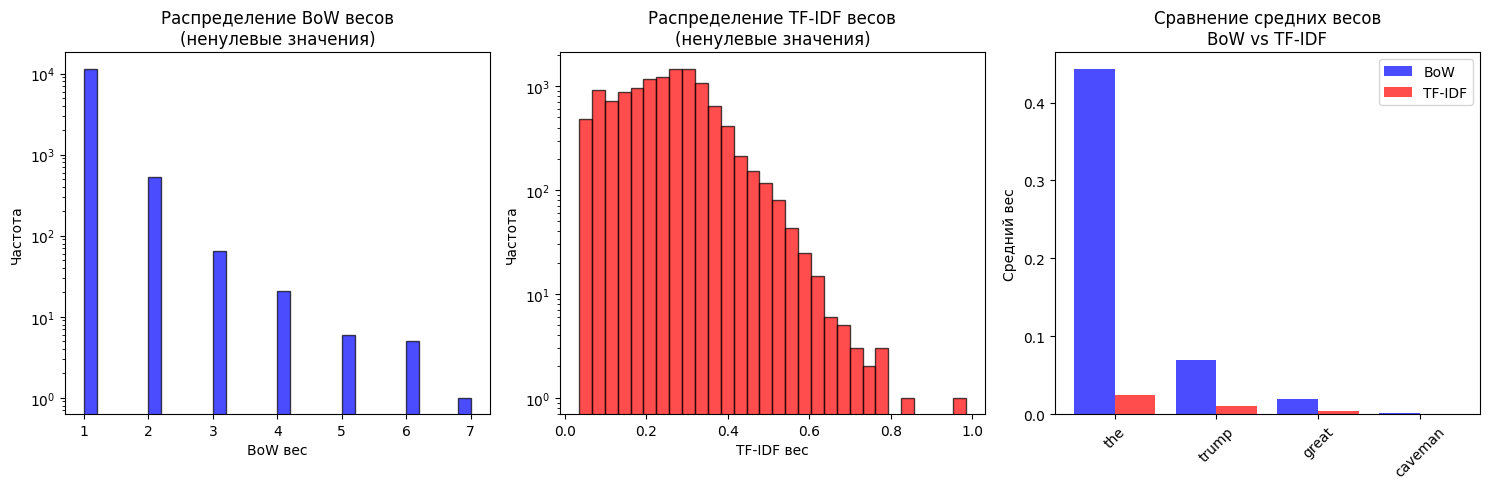


💡 ВЫВОДЫ ИЗ АНАЛИЗА:
1. BoW показывает ЧАСТОТУ слова в документах
2. TF-IDF показывает ВАЖНОСТЬ слова для документов
3. Частые слова (как 'the') имеют высокий BoW, но низкий TF-IDF
4. Редкие, но значимые слова имеют высокий TF-IDF
5. TF-IDF лучше выделяет уникальные и важные слова
6. BoW лучше для частотного анализа

✅ СРАВНЕНИЕ BOW И TF-IDF ЗАВЕРШЕНО!


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from gensim.models import TfidfModel
import string

print("🔍 СРАВНЕНИЕ BOW И TF-IDF ДЛЯ КОНКРЕТНЫХ СЛОВ")
print("=" * 60)

# Загружаем данные
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# Предобработка текстов
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

tokenized_docs = [preprocess_text(text) for text in texts]

# Создаем словарь и представления
dictionary = corpora.Dictionary(tokenized_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Создаем TF-IDF модель
tfidf_model = TfidfModel(bow_corpus, normalize=True)
tfidf_corpus = tfidf_model[bow_corpus]

# Преобразуем в плотные матрицы
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return np.array(dense_vectors)

def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return np.array(dense_vectors)

bow_dense = bow_to_dense(bow_corpus, dictionary)
tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)

# Анализируем словарь для выбора характерных слов
print("📊 АНАЛИЗ СЛОВАРЯ ДЛЯ ВЫБОРА ХАРАКТЕРНЫХ СЛОВ:")
print("=" * 50)

# Считаем частоты слов
word_freq = {}
for word_id in range(len(dictionary)):
    word = dictionary[word_id]
    freq = sum(bow_dense[:, word_id])
    word_freq[word] = freq

# Сортируем слова по частоте
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("Топ-20 самых частых слов:")
for i, (word, freq) in enumerate(sorted_words[:20]):
    print(f"{i+1:2d}. {word:15} - {freq:4d} раз")

# Выбираем характерные слова для анализа
# 1. Очень частое слово
# 2. Средней частоты слово
# 3. Редкое слово
# 4. Слово с высоким TF-IDF

characteristic_words = []
if 'the' in dictionary.token2id:
    characteristic_words.append('the')  # Очень частое
if 'trump' in dictionary.token2id:
    characteristic_words.append('trump')  # Средней частоты
if 'great' in dictionary.token2id:
    characteristic_words.append('great')  # Частое с эмоциональной окраской
if 'caveman' in dictionary.token2id:
    characteristic_words.append('caveman')  # Редкое, но важное

# Если какие-то слова не найдены, выберем альтернативные
if len(characteristic_words) < 4:
    for word, freq in sorted_words:
        if word not in characteristic_words and len(characteristic_words) < 4:
            characteristic_words.append(word)

print(f"\n🎯 ВЫБРАНЫ ДЛЯ АНАЛИЗА СЛОВА: {characteristic_words}")

# Функция для сравнения BoW и TF-IDF
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary, max_docs=20):
    """
    Сравнивает веса BoW и TF-IDF для выбранных слов

    Parameters:
    words - список слов для анализа
    bow_dense - плотная матрица BoW
    tfidf_dense - плотная матрица TF-IDF
    dictionary - словарь
    max_docs - максимальное количество документов для отображения
    """

    # Ограничиваем количество документов для читаемости
    if len(bow_dense) > max_docs:
        bow_dense = bow_dense[:max_docs]
        tfidf_dense = tfidf_dense[:max_docs]

    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()

    for i, word in enumerate(words):
        if i >= len(axes):
            break

        if word not in dictionary.token2id:
            print(f"⚠️  Слово '{word}' не найдено в словаре")
            continue

        word_id = dictionary.token2id[word]

        # Веса для этого слова в документах
        bow_weights = bow_dense[:, word_id]
        tfidf_weights = tfidf_dense[:, word_id]

        # Статистика
        bow_mean = np.mean(bow_weights)
        tfidf_mean = np.mean(tfidf_weights)
        bow_max = np.max(bow_weights)
        tfidf_max = np.max(tfidf_weights)

        x = range(len(bow_weights))
        width = 0.35

        # Столбчатая диаграмма
        axes[i].bar([p - width/2 for p in x], bow_weights, width,
                   alpha=0.7, label=f'BoW (ср: {bow_mean:.3f})', color='blue')
        axes[i].bar([p + width/2 for p in x], tfidf_weights, width,
                   alpha=0.7, label=f'TF-IDF (ср: {tfidf_mean:.3f})', color='red')

        axes[i].set_title(f'Сравнение весов: "{word}"\n'
                         f'BoW макс: {bow_max}, TF-IDF макс: {tfidf_max:.3f}',
                         fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Документы')
        axes[i].set_ylabel('Вес')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

        # Устанавливаем метки на оси X только для каждого 5-го документа для читаемости
        if len(x) > 10:
            axes[i].set_xticks(x[::5])
            axes[i].set_xticklabels([f'Док {i+1}' for i in x[::5]])
        else:
            axes[i].set_xticks(x)
            axes[i].set_xticklabels([f'Док {i+1}' for i in x])

    # Убираем лишние subplots
    for i in range(len(words), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Сравниваем выбранные слова
print(f"\n📈 ГРАФИКИ СРАВНЕНИЯ BOW И TF-IDF")
print("=" * 50)
compare_bow_tfidf(characteristic_words, bow_dense, tfidf_dense, dictionary, max_docs=15)

# Дополнительный анализ: сравнение статистик
print(f"\n📊 СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ДЛЯ ВЫБРАННЫХ СЛОВ:")
print("=" * 60)
print(f"{'Слово':<15} {'DF':<4} {'Avg BoW':<8} {'Avg TF-IDF':<10} {'Max BoW':<8} {'Max TF-IDF':<10}")
print("-" * 70)

for word in characteristic_words:
    if word in dictionary.token2id:
        word_id = dictionary.token2id[word]

        # Document Frequency
        df = sum(1 for doc in bow_corpus if any(idx == word_id for idx, _ in doc))

        # Веса
        bow_weights = bow_dense[:, word_id]
        tfidf_weights = tfidf_dense[:, word_id]

        avg_bow = np.mean(bow_weights)
        avg_tfidf = np.mean(tfidf_weights)
        max_bow = np.max(bow_weights)
        max_tfidf = np.max(tfidf_weights)

        print(f"{word:<15} {df:<4} {avg_bow:<8.3f} {avg_tfidf:<10.3f} {max_bow:<8} {max_tfidf:<10.3f}")

# Визуализация распределения весов для всех слов
plt.figure(figsize=(15, 5))

# Распределение BoW весов
plt.subplot(1, 3, 1)
bow_nonzero = bow_dense[bow_dense > 0]
plt.hist(bow_nonzero, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('BoW вес')
plt.ylabel('Частота')
plt.title('Распределение BoW весов\n(ненулевые значения)')
plt.yscale('log')

# Распределение TF-IDF весов
plt.subplot(1, 3, 2)
tfidf_nonzero = tfidf_dense[tfidf_dense > 0]
plt.hist(tfidf_nonzero, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('TF-IDF вес')
plt.ylabel('Частота')
plt.title('Распределение TF-IDF весов\n(ненулевые значения)')
plt.yscale('log')

# Сравнение средних весов
plt.subplot(1, 3, 3)
sample_words = characteristic_words
bow_means = [np.mean(bow_dense[:, dictionary.token2id[word]]) for word in sample_words]
tfidf_means = [np.mean(tfidf_dense[:, dictionary.token2id[word]]) for word in sample_words]

x = range(len(sample_words))
plt.bar([i - 0.2 for i in x], bow_means, 0.4, label='BoW', alpha=0.7, color='blue')
plt.bar([i + 0.2 for i in x], tfidf_means, 0.4, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x, sample_words, rotation=45)
plt.ylabel('Средний вес')
plt.title('Сравнение средних весов\nBoW vs TF-IDF')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n💡 ВЫВОДЫ ИЗ АНАЛИЗА:")
print("=" * 50)
print("1. BoW показывает ЧАСТОТУ слова в документах")
print("2. TF-IDF показывает ВАЖНОСТЬ слова для документов")
print("3. Частые слова (как 'the') имеют высокий BoW, но низкий TF-IDF")
print("4. Редкие, но значимые слова имеют высокий TF-IDF")
print("5. TF-IDF лучше выделяет уникальные и важные слова")
print("6. BoW лучше для частотного анализа")

print(f"\n✅ СРАВНЕНИЕ BOW И TF-IDF ЗАВЕРШЕНО!")

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```